Prueba 1 realizada por Cristóbal Novoa

In [1]:
##Se importan librerias necesarias
from pyspark.sql import SparkSession

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1639865383821_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#Se indica ruta donde esta ubicado el parquet
path ='s3://bigdata-desafio/transantiago/'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
#Se lee el parquet
df = spark.read.parquet(path)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
#Se muestra Schema
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- fechahoratrx: timestamp (nullable = true)
 |-- codigoentidad: long (nullable = true)
 |-- nombreentidad: string (nullable = true)
 |-- codigositio: long (nullable = true)
 |-- nombresitio: string (nullable = true)
 |-- nrotarjeta: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- from: integer (nullable = true)
 |-- to: integer (nullable = true)

In [6]:
#Se muestra el contenido del parquet
df.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------+-------------+-----------+-----------+--------------------+--------+--------+--------+
|       fechahoratrx|codigoentidad|nombreentidad|codigositio|nombresitio|          nrotarjeta|     day|    from|      to|
+-------------------+-------------+-------------+-----------+-----------+--------------------+--------+--------+--------+
|2018-08-08 06:17:00|            4| U4 - Express|       5517|    ZN-6156|10699ec735e3a7ef1...|20180903|20180827|20180829|
|2018-08-08 06:17:03|            4| U4 - Express|       5517|    ZN-6156|43ce6a265f01a62f1...|20180903|20180827|20180829|
|2018-08-08 06:17:40|            4| U4 - Express|       5517|    ZN-6156|b5476ff3fd038b53d...|20180903|20180827|20180829|
|2018-08-08 06:17:44|            4| U4 - Express|       5517|    ZN-6156|c79b63a8c7112ea5f...|20180903|20180827|20180829|
|2018-08-08 06:17:47|            4| U4 - Express|       5517|    ZN-6156|d2c27d8ff4b0f0701...|20180903|20180827|20180829|
|2018-08-08 06:17:50|   

In [7]:
#Se crea tabla temporal para realizar consultas SQL
df.createOrReplaceTempView("ts_tb")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Ejercicio 1: Operaciones básicas (1 Punto)
● Determine:
○ Cantidad de transacciones.

In [8]:
%%sql
SELECT COUNT(1) as cantidad_transacciones
FROM ts_tb

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La cantidad de transacciones realizadas es de 456532128

○ Primera y última transacción en función de la columna fechahoratrx.

In [9]:
%%sql
SELECT *
FROM ts_tb
ORDER BY fechahoratrx
LIMIT 1

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La primera transacción realizada fue el 16 de Abril del 2016

In [10]:
%%sql
SELECT * 
FROM ts_tb
ORDER BY fechahoratrx DESC 
LIMIT 1

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La última transacción realizada fue el 03 de Septiembre del 2018

Ejercicio 2: Operadores del servicio (1 punto)
● Liste los distintos operadores.


In [11]:
%%sql
SELECT DISTINCT nombreentidad
FROM ts_tb

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La lista de operadores es la indicada en la query

● Muestre la cantidad de transacciones para cada operador.

In [12]:
%%sql
SELECT nombreentidad, COUNT(*) as cantidad_transacciones
FROM ts_tb
GROUP BY nombreentidad

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La cantidad de transacciones realizadas para cada operador es la indicada en la query

Ejercicio 3: Tarjetas Bip! (4 Puntos)
● Muestre las 20 tarjetas con más transacciones. (2 Puntos)

In [14]:
%%sql
SELECT DISTINCT nrotarjeta, COUNT(*) as numero_transacciones 
FROM ts_tb
GROUP BY nrotarjeta
ORDER BY numero_transacciones DESC
LIMIT 20

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

Se indica en la query las 20 tarjetas con más transacciones

● Cuente todas las tarjetas que posean más de 2 transacciones por día. (2 Puntos)

In [16]:
%%sql
SELECT COUNT(DISTINCT nrotarjeta)
FROM(
SELECT nrotarjeta, CAST(fechahoratrx AS date) AS fecha, COUNT(nrotarjeta) AS conteo_tarjetas
FROM ts_tb
GROUP BY nrotarjeta, fecha
HAVING conteo_tarjetas > 2
)TEMP

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

La cantidad de tarjetas con más de 2 transacciones por día son 5353814

Ejercicio 4: Fechas y rangos de horario (4 Puntos)
● Determine los 10 días con más transacciones. (1 Punto)

In [18]:
%%sql
SELECT CAST(fechahoratrx AS date) AS dia, COUNT(*) AS transacciones
FROM ts_tb
WHERE 
GROUP BY dia
ORDER BY transacciones DESC
LIMIT 10

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

Se indican en la query los días con más transacciones

● Realice una comparación de la cantidad de transacciones por hora para cada
operador. Muestre sus resultados en un gráfico donde el eje X sea la hora del día y el
eje Y la cantidad de transacciones. (3 Puntos)

In [19]:
#Se importan librerias
import pyspark
import pyspark.sql.functions as f

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
%%local
#Se instalan librerias en local
!pip3 install matplotlib
!pip3 install seaborn

     |████████████████████████████████| 292 kB 8.5 MB/s eta 0:00:01


In [21]:
%%local
#Se importan librerias necesarias para graficar 

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%%spark -o dfx

#Se genera tabla para obtener data de la grafica comparativa
dfx = df\
    .select(f.hour('fechahoratrx').alias('hora'), df.codigoentidad.alias('codigo_operador'), df.nombreentidad.alias('nombre_operador'))\
    .groupBy("nombre_operador", "hora").count().orderBy("hora", ascending=True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
%%local
#Se muestran primeros resultados
dfx.head()

Output()

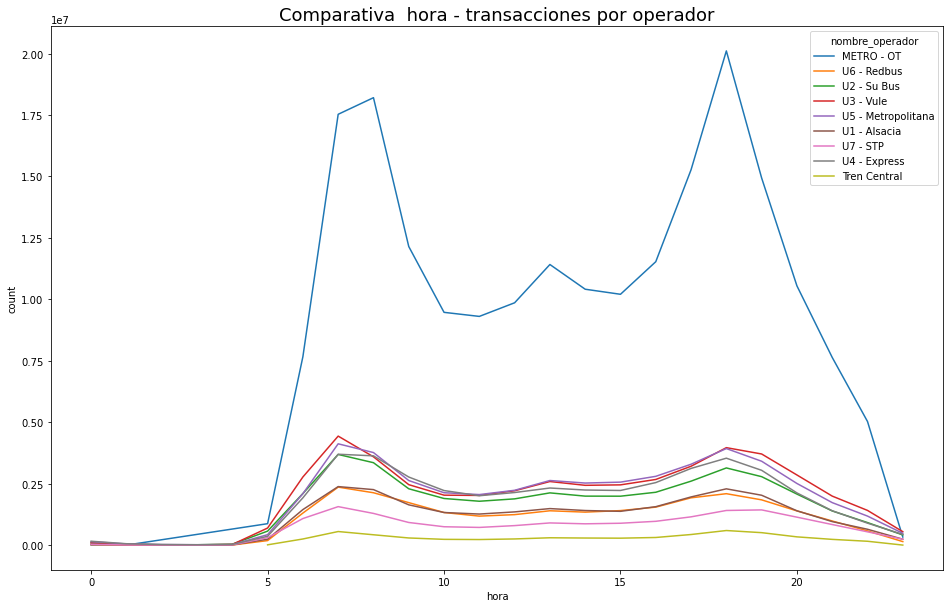

In [24]:
%%local
#Se genera grafica comparativa hora-transacciones por operador
plt.figure(figsize=(16,10))
sns.lineplot(data = dfx, y = 'count', x = 'hora', hue = 'nombre_operador')
plt.title('Comparativa  hora - transacciones por operador', fontsize = 18)
plt.show()